## Import initial libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

## Working with Shape File

### Loading Zip Code Shape File¶

In [117]:
from geopandas import GeoDataFrame
shape_path='NYC_cts.geojson'
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010
ct_shape = ct_shape.sort_index()
ct_shape = ct_shape.drop(['BoroCode', 'CDEligibil', 'CTLabel', 'CT2010', 'OBJECTID', 'PUMA'], axis=1)
ct_shape

ERROR:Fiona:CPLE_AppDefined in HTTP error code : 404


,BoroCT2010,BoroName,NTACode,NTAName,Shape__Area,Shape__Length,geometry
BoroCT2010,,,,,,,
1000100,1000100,Manhattan,MN99,park-cemetery-etc-Manhattan,0.000018,0.035530,"(POLYGON ((-74.0438790756632 40.6901959260107,..."
1000600,1000600,Manhattan,MN28,Lower East Side,0.000026,0.021756,"POLYGON ((-73.99022156959271 40.7144131971671,..."
1000700,1000700,Manhattan,MN25,Battery Park City-Lower Manhattan,0.000025,0.038632,"(POLYGON ((-74.0074600585617 40.7072275549791,..."
1000800,1000800,Manhattan,MN27,Chinatown,0.000023,0.019829,"POLYGON ((-73.99190688746251 40.7095336528361,..."
1001001,1001001,Manhattan,MN28,Lower East Side,0.000009,0.012767,"POLYGON ((-73.9751899486096 40.7145114185393, ..."
1001002,1001002,Manhattan,MN28,Lower East Side,0.000022,0.020140,"POLYGON ((-73.97351488967389 40.7187831034178,..."
1001200,1001200,Manhattan,MN28,Lower East Side,0.000013,0.017631,"POLYGON ((-73.9805787809798 40.7164638241871, ..."
1001402,1001402,Manhattan,MN28,Lower East Side,0.000012,0.014074,"POLYGON ((-73.98507486473569 40.7190915522248,..."
1001501,1001501,Manhattan,MN25,Battery Park City-Lower Manhattan,0.000028,0.029612,"(POLYGON ((-73.9950227909013 40.7031561241413,..."


### Visualize the Cencus Tract boundaries colored by boroughs

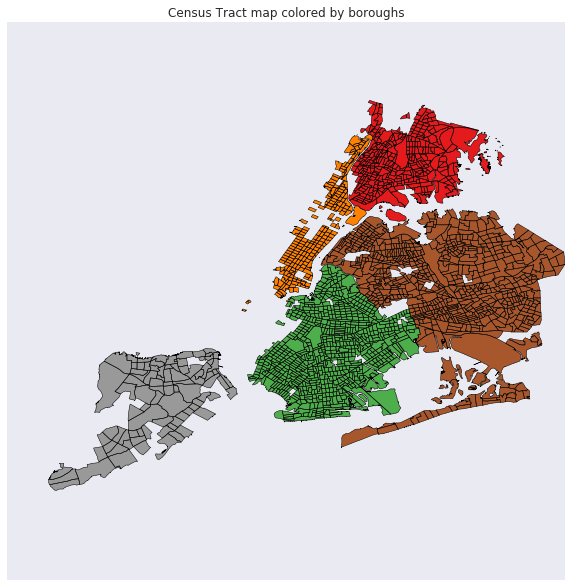

In [75]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroName',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

Figure 1: A map of the CTs in NYC color coded by borough.

### Load Crime data

In [46]:
df_crime=DataFrame.from_csv('Data/crime_latlon_CTs.csv')
df_crime.head()

,lat,lon,census_tract,crimes
0,40.675955,-73.735304,4061800,5.0
1,40.804214,-73.964751,1019900,188.0
2,40.670460,-73.882559,3116400,65.0
3,40.822017,-73.938915,1023200,266.0
4,40.749871,-73.898905,4026100,63.0


### Add the crime averages to the zipcode shapefile 

In [80]:
crimes_by_ct = df_crime.groupby('census_tract').sum()[['crimes']]
crimes_by_ct.head()

,crimes
census_tract,
1000100,2.0
1000600,5192.0
1000700,3322.0
1000800,4141.0
1001001,516.0


In [118]:
ct_shape = ct_shape.merge(crimes_by_ct, left_index=True, right_index=True)

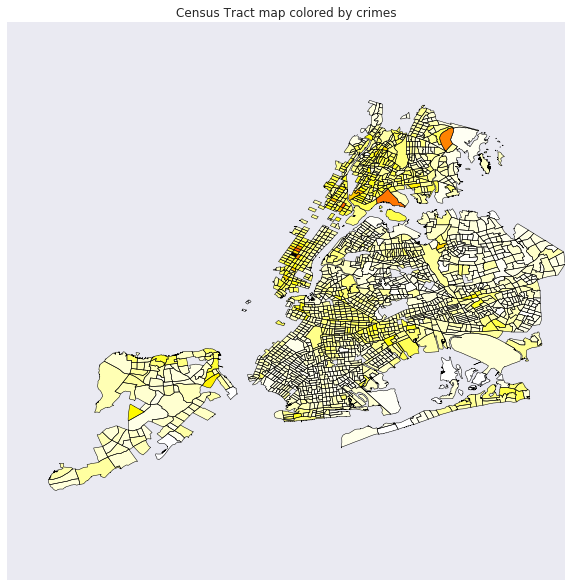

In [82]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='crimes',colormap='hot_r',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by crimes")

Figure 2: A plot of the crime counts in NYC at the census tract level.

### Export Shapefile CTs w/ crime data

In [84]:
path='crime_latlon_ct_out.shp'
ct_shape.to_file(path)

## Geospatial Analysis

In [85]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights indicate whether shapes share common boundaries

In [86]:
qW_ct=ps.queen_from_shapefile(path)

('Island ids: ', [0, 134, 135, 138, 144, 536, 581])


#### Neighbors of index10

In [87]:
qW_ct[10]

{1: 1.0, 3: 1.0, 11: 1.0, 17: 1.0, 19: 1.0, 27: 1.0}

In [88]:
qW_ct.cardinalities[10]

6

#### Matrix of Weights

In [89]:
Wmatrix, ids = qW_ct.full()

In [90]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [91]:
qW_ct.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 536, ' is an island (no neighbors)')
('WARNING: ', 581, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of Zip neighbors can be meseard by means of spatial lag as follow:
$$CrimeCountLag = \sum_j w_{i,j} CrimeCount$$

In [92]:
CrimeCount=ct_shape.crimes
CrimeCountLag=ps.lag_spatial(qW_ct, CrimeCount)

#### Create Quantiles for maping

In [93]:
CrimeCountLagQ10 = ps.Quantiles(CrimeCountLag, k=10)
CrimeCountLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=   865.500               201
  865.500 < x[i] <=  1105.514               199
 1105.514 < x[i] <=  1321.695               199
 1321.695 < x[i] <=  1566.620               200
 1566.620 < x[i] <=  1853.800               200
 1853.800 < x[i] <=  2283.960               199
 2283.960 < x[i] <=  2801.100               200
 2801.100 < x[i] <=  3398.422               199
 3398.422 < x[i] <=  4373.980               200
 4373.980 < x[i] <= 13710.000               200

#### Map the monthly rides lag

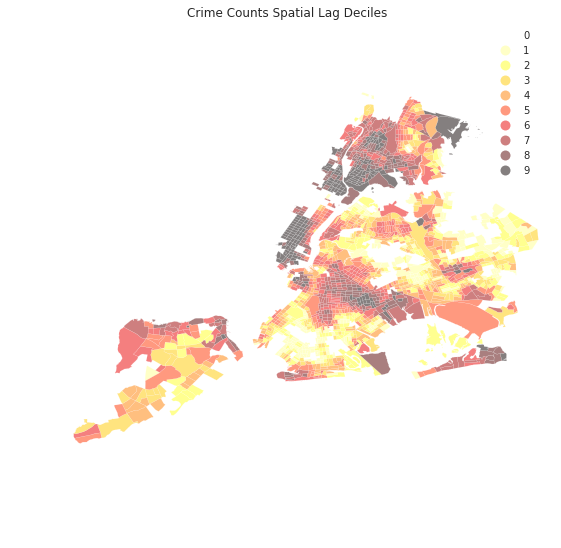

In [94]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape.assign(cl=CrimeCountLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Crime Counts Spatial Lag Deciles")


Figure 3: A plot of the deciles of crime counts in NYC. The heaviest areas of crime relative to their surroundings appear to Lower and far Upper Manhattan, lower Bronx and Brownsville, Brooklyn.

## Global  Spatial Autocorrelation

In [95]:
b,a = np.polyfit(CrimeCount, CrimeCountLag, 1)
b,a 

(0.49916425402742054, 1194.9152258546635)

### Moran Scatterplot

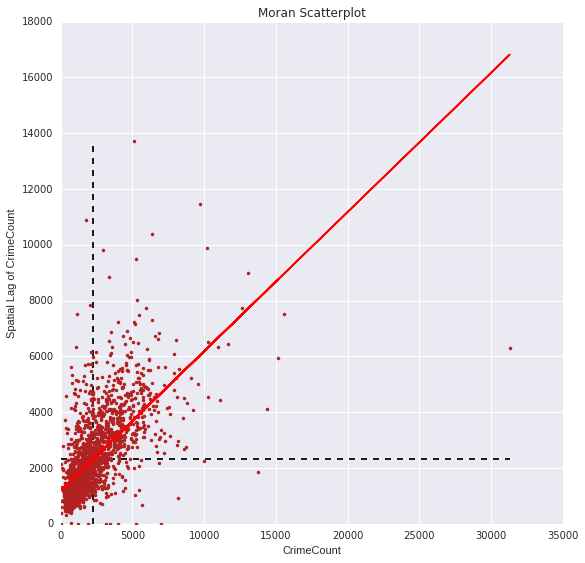

In [96]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(CrimeCount, CrimeCountLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(CrimeCount.mean(), CrimeCountLag.min(), CrimeCountLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(CrimeCountLag.mean(), CrimeCount.min(), CrimeCount.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(CrimeCount, a + b*CrimeCount, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of CrimeCount')
plt.xlabel('CrimeCount')

Figure 4: A Moran Scatterplot for crime counts in NYC. The positive regression slope indicates an overall highly positive level of autocorrelation in the data.

### Moran's I

In [97]:
I_CrimeCount = ps.Moran(CrimeCount, qW_ct)

In [98]:
I_CrimeCount.I, I_CrimeCount.p_sim

(0.50363902777911929, 0.001)

Thus, the $I$ statistic is $0.5213$ for this data, and has a very small $p$ value. 

In [99]:
I_CrimeCount.sim[0:10]

array([-0.01598903, -0.00503894,  0.01501487,  0.0206514 , -0.0069591 ,
       -0.00387494, -0.01205925,  0.01328073,  0.0020538 ,  0.00150947])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [100]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

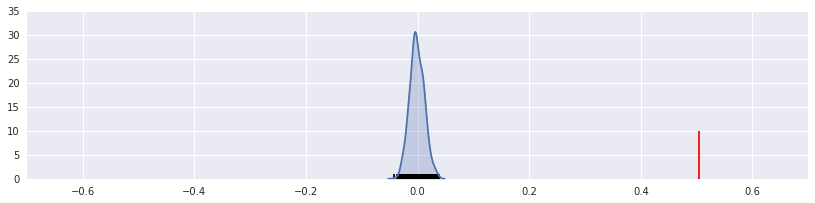

In [101]:
sns.kdeplot(I_CrimeCount.sim, shade=True)
plt.vlines(I_CrimeCount.sim, 0, 1)
plt.vlines(I_CrimeCount.I, 0, 10, 'r')
plt.xlim([-.70, .70])

Figure 5: A plot of the observed Moran's I statistic compared with it's expected value under the null hypothesis of zero overall autocorrelation. Our statistic is very far outside the standard distribution, indicating the presence of autocorrelation.

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

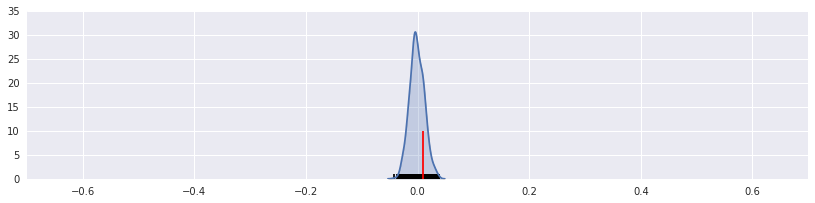

In [102]:
sns.kdeplot(I_CrimeCount.sim, shade=True)
plt.vlines(I_CrimeCount.sim, 0, 1)
plt.vlines(I_CrimeCount.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

Figure 6: A plot of the a hypothetical non-significant Moran's I statistic compared with it's expected value under the null hypothesis of zero overall autocorrelation. In this situation the statistic is inside the standard distribution, indicating that we would not be able to reject the null hypothesis.

## Local  Spatial Autocorrelation

In [103]:
LMo_CrimeCount = ps.Moran_Local(CrimeCount, qW_ct,permutations=999)

In [104]:
LMo_CrimeCount.Is[0:5], LMo_CrimeCount.p_sim[0:5]

(array([-0.        ,  1.78327052,  0.02359793,  0.88424002, -0.27687541]),
 array([ 0.001,  0.053,  0.367,  0.045,  0.254]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [105]:
sigs = CrimeCount[LMo_CrimeCount.p_sim <= .001]
W_sigs = CrimeCountLag[LMo_CrimeCount.p_sim <= .001]
insigs = CrimeCount[LMo_CrimeCount.p_sim > .001]
W_insigs = CrimeCountLag[LMo_CrimeCount.p_sim > .001]

### Plot Signficant LISA

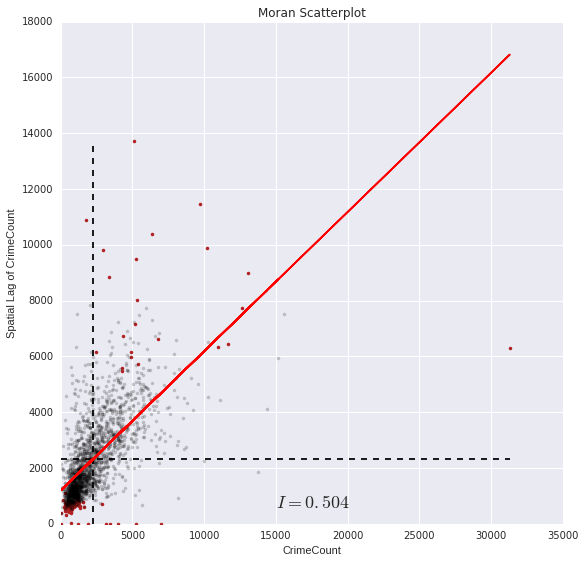

In [106]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_CrimeCount.I, x=15000, y=600, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(CrimeCount.mean(), CrimeCountLag.min(), CrimeCountLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(CrimeCountLag.mean(), CrimeCount.min(), CrimeCount.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(CrimeCount, a + b*CrimeCount, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of CrimeCount')
plt.xlabel('CrimeCount')


Figure 7: A Moran Scatterplot for crime tallies in NYC Census Tracts color-coded to indicate which data indicate a significant presence of autocorrelation. There are a large number of significant points in the first and third quadrants, indicating hot and cold spots respectively. There are relatively few significant points in the second quadrant and fourth, which indicate negative autocorrelations.

### Hot and Cold spots 

In [107]:
sig = LMo_CrimeCount.p_sim < 0.01
hotspots = LMo_CrimeCount.q==1 * sig
coldspots = LMo_CrimeCount.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 115
Number of Coldspots: 222


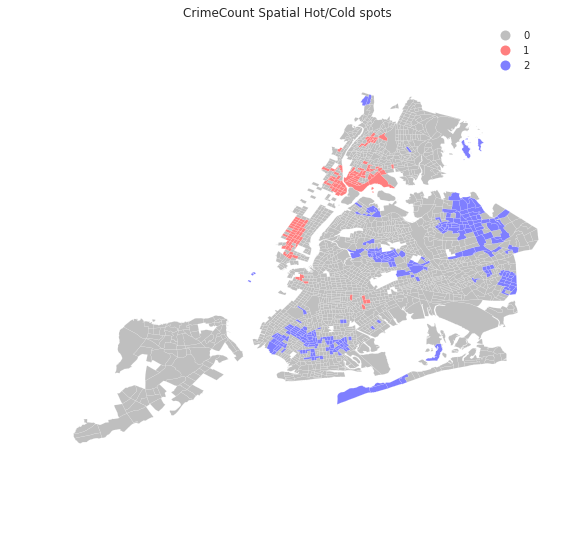

In [108]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("CrimeCount Spatial Hot/Cold spots")

Figure 8: A heatmap of hotspots and cold spots of crime in NYC. The majority of the hotspots are clustered in the Lower and far Upper side of Manhattan along with southern Bronx. Interstingly, the cold spots appear to be clustered in areas around Bayside, Queens and Bensonhurst, Brooklyn, the first being an wealthy neighborhood dotted with gated communities and the second being a lower income neighborhood penalized for its complete absence of nightlife. This suggest that there are more than just socio-economic factors that determine a "safe" neighborhood.

In [119]:
ct_shape[(hotspots)&(ct_shape['BoroName']=='Brooklyn')]

,BoroCT2010,BoroName,NTACode,NTAName,Shape__Area,Shape__Length,geometry,crimes
3001100,3001100,Brooklyn,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0.000018,0.018478,"POLYGON ((-73.9851445016434 40.6948933965908, ...",6868.0
3001500,3001500,Brooklyn,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0.000033,0.029658,"POLYGON ((-73.9805107012412 40.6974545288241, ...",7427.0
3003300,3003300,Brooklyn,BK68,Fort Greene,0.000018,0.021669,"POLYGON ((-73.9814745912131 40.6899394623635, ...",4702.0
3035900,3035900,Brooklyn,BK61,Crown Heights North,0.000019,0.019223,"POLYGON ((-73.9221329530837 40.6736921411766, ...",4188.0
3090600,3090600,Brooklyn,BK81,Brownsville,0.000021,0.018673,"POLYGON ((-73.9063564809377 40.6677161473918, ...",5702.0
3091000,3091000,Brooklyn,BK81,Brownsville,0.000023,0.019074,"POLYGON ((-73.9008527687009 40.6653541452971, ...",5273.0
3091200,3091200,Brooklyn,BK81,Brownsville,0.000018,0.017062,"POLYGON ((-73.9051744415947 40.6631137467186, ...",6120.0
3091600,3091600,Brooklyn,BK81,Brownsville,0.000023,0.020555,"POLYGON ((-73.9071926178534 40.6596276538234, ...",4329.0


Brownsville, Crown Heights, Fort Greene and Boerum Hill appear to be clusters of crime in Brooklyn